## CPPI Article #1

#### Imports

In [83]:
import sys, os
import datetime as dt

In [84]:
# Add the project dir
sys.path.append(os.path.abspath('../'))
from src.core import *

In [85]:
# Add the paths generation classes
sys.path.append(os.path.abspath('../paths/'))
from paths import *

In [86]:
# Reload classes on-the-fly
# to take into account modifications
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate some Monte Carlo paths

In [87]:
mc_paths = 100

In [88]:
sample = 1

In [89]:
gbm = GeometricBrownianMotion(volatility=0.5, 
                              drift=0.0, 
                              initial_value=100.0, 
                              maturity=5.0, 
                              time_intervals=365*5)
gbm.generate(mc_paths)
df_paths = gbm.to_datetime_index()

<Axes: >

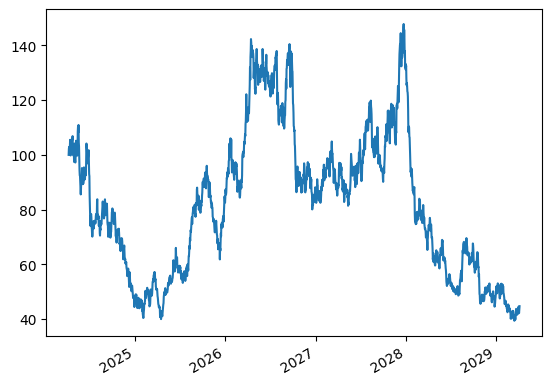

In [90]:
df_paths.iloc[:, sample].plot()

### Create a CPPI Simulation

In [91]:
from src.cppi.strategy import CppiStrategy

In [98]:
# Construct a historical data feed
#
# feed = MonteCarloDataFeed(df_paths, columns=[sample, ])

csv_path = "C:\\Users\\pace8\\PycharmProjects\\Backtesting\\dataset\\ou.csv"
feed = MonteCarloDataFeed(csv_path, columns=[sample, ])

In [99]:
# This is the object that provides analysis of the results 
#
analytics = AnalyticsEngine()

In [100]:
# Set up a CPPI strategy and wrap it into the execution agent
#
cppi = CppiStrategy(floor=0.8, initial_value=100000.0, reset_freq=dt.timedelta(days=20))
exec_cppi = ExecutionEngine(cppi)

In [101]:
# The context provides the support for backtesting
#
context = ContextualEngine(data=feed,
                           agent=exec_cppi,
                           analytics=analytics)

# Start the backtest
context.start()

Initializing <src.core.execution.ExecutionEngine object at 0x00000255FFEC30E0>
Initializing <src.core.analytics.AnalyticsEngine object at 0x00000255FF94BE60>
Initializing <src.core.feed.monte_carlo.MonteCarloDataFeed object at 0x00000255FF6FE750>
CPPI strategy started at 2024-04-05 15:58:55.
CPPI reset at a NAV of 103.01% on 2024-04-26 15:58:55.
CPPI reset at a NAV of 88.65% on 2024-05-17 15:58:55.
CPPI reset at a NAV of 80.44% on 2024-06-07 15:58:55.
CPPI reset at a NAV of 69.49% on 2024-06-28 15:58:55.
CPPI reset at a NAV of 82.55% on 2024-07-19 15:58:55.
CPPI reset at a NAV of 98.10% on 2024-08-09 15:58:55.
CPPI reset at a NAV of 92.25% on 2024-08-30 15:58:55.
CPPI reset at a NAV of 78.61% on 2024-09-20 15:58:55.
CPPI reset at a NAV of 76.41% on 2024-10-11 15:58:55.
CPPI reset at a NAV of 65.79% on 2024-11-01 15:58:55.
CPPI reset at a NAV of 79.60% on 2024-11-22 15:58:55.
CPPI reset at a NAV of 92.91% on 2024-12-13 15:58:55.
CPPI reset at a NAV of 102.92% on 2025-01-03 15:58:55.
CPP

In [102]:
results = analytics.realizations[0]

In [104]:
results.strategy.asset_price

{datetime.datetime(2024, 4, 5, 15, 58, 55): 100.0,
 datetime.datetime(2024, 4, 6, 15, 58, 55): 102.29187774599896,
 datetime.datetime(2024, 4, 7, 15, 58, 55): 104.80183386194834,
 datetime.datetime(2024, 4, 8, 15, 58, 55): 104.49715837378623,
 datetime.datetime(2024, 4, 9, 15, 58, 55): 105.7354989724744,
 datetime.datetime(2024, 4, 10, 15, 58, 55): 103.04121320275485,
 datetime.datetime(2024, 4, 11, 15, 58, 55): 100.39401936362631,
 datetime.datetime(2024, 4, 12, 15, 58, 55): 102.50001975123836,
 datetime.datetime(2024, 4, 13, 15, 58, 55): 105.01779950685189,
 datetime.datetime(2024, 4, 14, 15, 58, 55): 107.33455700738712,
 datetime.datetime(2024, 4, 15, 15, 58, 55): 101.2065820709932,
 datetime.datetime(2024, 4, 16, 15, 58, 55): 96.36277330788609,
 datetime.datetime(2024, 4, 17, 15, 58, 55): 97.14812209656118,
 datetime.datetime(2024, 4, 18, 15, 58, 55): 99.58186919623698,
 datetime.datetime(2024, 4, 19, 15, 58, 55): 103.48765554265502,
 datetime.datetime(2024, 4, 20, 15, 58, 55): 103